In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
warnings.filterwarnings("ignore")
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
# Initialization of directory information:
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
dataDir = thisDir + 'data/mvpa_data/'
outDir = thisDir + 'output/mL/results/ridge/permutation/'
regDir = thisDir + 'output/mL/results/ridge/acc/'

"""
CV=pd.read_csv(regDir+'CV/acc.csv')
SS=pd.read_csv(regDir+'SS/acc.csv',usecols=[1,2,3,4])
BS=pd.read_csv(regDir+'BS/acc.csv',usecols=[1,2,3,4,5])
DS=pd.read_csv(regDir+'DS/acc.csv',usecols=[1,2,3,4])

#prepping BS and SS
BS.rename(columns={'train_sub':'sub'},inplace=True)

diff_task=SS.merge(BS,how='left',on=['train_task','test_task','sub'],suffixes=('','_BS'))
#SS-OS
diff_task['diff'] =diff_task.acc-diff_task.acc_BS 
#subset so we only average the SS-OS per train/test tasks
DT=diff_task[['train_task','test_task','diff']]
#take average
diffDT=DT.groupby(['train_task','test_task']).mean()
diffDT.reset_index(inplace=True)


#permuted same task (SS-OS) CV-DS
pST=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/DS/diff_acc.csv',na_values=[9999])

#permuted different task (SS-OS) SS-BS
pDT=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/SS/diff_acc.csv',na_values=[9999])


mem=pST[pST.task=='mem']
mix=pST[pST.task=='mixed']
mot=pST[pST.task=='motor']
subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
taskList=['motor','mem','mixed']
CV=pd.melt(CV,id_vars=['sub'],value_vars=['mixed','motor','mem'], var_name='task', value_name='acc')
DS.rename(columns={'train_sub':'sub'},inplace=True)
same_task=CV.merge(DS,how='left',on=['task','sub'],suffixes=('','_DS'))
#SS-OS
same_task['diff'] =same_task.acc-same_task.acc_DS 
#subset so we only average the SS-OS per train/test tasks
ST=same_task[['task','diff']]
#take average
diffST=ST.groupby(['task']).mean()
diffST.reset_index(inplace=True)

diffDT['TrTe'] = diffDT.train_task.map(str) + "_" + diffDT.test_task
DT=diffDT[['TrTe','diff']]
DT.set_index('TrTe',inplace=True)

#DT seperated
memTmot=pDT[(pDT.train_task=='mem') & (pDT.test_task=='motor')]
memTmix=pDT[(pDT.train_task=='mem') & (pDT.test_task=='mixed')]
mixTmot=pDT[(pDT.train_task=='mixed') & (pDT.test_task=='motor')]
mixTmem=pDT[(pDT.train_task=='mixed') & (pDT.test_task=='mem')]
motTmix=pDT[(pDT.train_task=='motor') & (pDT.test_task=='mixed')]
motTmem=pDT[(pDT.train_task=='motor') & (pDT.test_task=='mem')]



#comparison of generating null results
perm_same_task=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/same_task.csv')
perm_diff_task=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/diff_task.csv')


same_task=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/real_same_task.csv')
diff_task=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/real_diff_task.csv')


permCV=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/CV/reformat_acc.csv')
permSS=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/SS/reformat_acc.csv')
permDS=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/DS/reformat_acc.csv')
permBS=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/BS/reformat_acc.csv')




CV=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/CV/real_reformat_acc.csv')
SS=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/SS/real_reformat_acc.csv')
DS=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/DS/real_reformat_acc.csv')
BS=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/BS/real_reformat_acc.csv')
"""



#Splitting up Mixed into semantic and glass now testing for significance
CV=pd.read_csv(thisDir+'output/mL_allTask/results/ridge/acc/CV/acc.csv')
DS=pd.read_csv(thisDir+'output/mL_allTask/results/ridge/acc/DS/acc.csv',usecols=[1,2,3,4])
BS=pd.read_csv(thisDir+'output/mL_allTask/results/ridge/acc/BS/acc.csv',usecols=[1,2,3,4,5])
SS=pd.read_csv(thisDir+'output/mL_allTask/results/ridge/acc/SS/acc.csv',usecols=[1,2,3,4])
CV=pd.melt(CV,id_vars=['sub'],value_vars=['semantic','glass','motor','mem'], var_name='task', value_name='acc')

DS.rename(columns={'train_sub':'sub'},inplace=True)

same_task=CV.merge(DS,how='left',on=['task','sub'],suffixes=('','_DS'))
#SS-OS
same_task['diff'] =same_task.acc-same_task.acc_DS 
#subset so we only average the SS-OS per train/test tasks
ST=same_task[['task','diff']]
#take average
diffST=ST.groupby(['task']).mean()
diffST.reset_index(inplace=True)

#prepping BS and SS
BS.rename(columns={'train_sub':'sub'},inplace=True)

diff_task=SS.merge(BS,how='left',on=['train_task','test_task','sub'],suffixes=('','_BS'))
#SS-OS
diff_task['diff'] =diff_task.acc-diff_task.acc_BS 
#subset so we only average the SS-OS per train/test tasks
DT=diff_task[['train_task','test_task','diff']]
#take average
diffDT=DT.groupby(['train_task','test_task']).mean()
diffDT.reset_index(inplace=True)
diffDT['TrTe'] = diffDT.train_task.map(str) + "_" + diffDT.test_task
DT=diffDT[['TrTe','diff']]
DT.set_index('TrTe',inplace=True)
#permuted same task (SS-OS) CV-DS
pST=pd.read_csv(thisDir+'output/mL_allTask/results/ridge/permutation/DS/diff_acc.csv',na_values=[9999])

#permuted different task (SS-OS) SS-BS
pDT=pd.read_csv(thisDir+'output/mL_allTask/results/ridge/permutation/SS/diff_acc.csv',na_values=[9999])

#ST seperates
mem=pST[pST.task=='mem']
gla=pST[pST.task=='glass']
sem=pST[pST.task=='semantic']
mot=pST[pST.task=='motor']

#DT seperated
memTmot=pDT[(pDT.train_task=='mem') & (pDT.test_task=='motor')]
memTsem=pDT[(pDT.train_task=='mem') & (pDT.test_task=='semantic')]
memTgla=pDT[(pDT.train_task=='mem') & (pDT.test_task=='glass')]
glaTmot=pDT[(pDT.train_task=='glass') & (pDT.test_task=='motor')]
glaTmem=pDT[(pDT.train_task=='glass') & (pDT.test_task=='mem')]
glaTsem=pDT[(pDT.train_task=='glass') & (pDT.test_task=='semantic')]
semTmot=pDT[(pDT.train_task=='semantic') & (pDT.test_task=='motor')]
semTmem=pDT[(pDT.train_task=='semantic') & (pDT.test_task=='mem')]
semTgla=pDT[(pDT.train_task=='semantic') & (pDT.test_task=='glass')]
motTsem=pDT[(pDT.train_task=='motor') & (pDT.test_task=='semantic')]
motTgla=pDT[(pDT.train_task=='motor') & (pDT.test_task=='glass')]
motTmem=pDT[(pDT.train_task=='motor') & (pDT.test_task=='mem')]

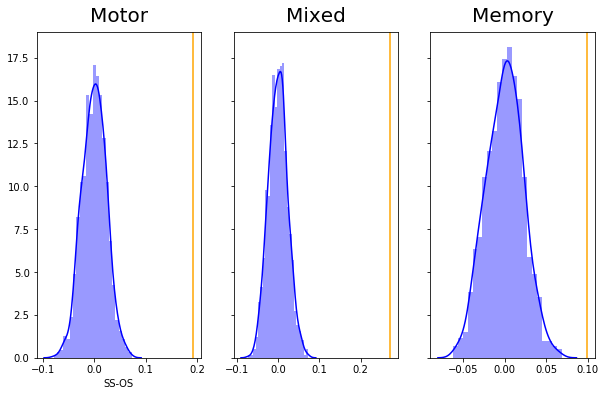

In [10]:
#General results
fig=plt.figure(figsize=(10,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=1, ncols=3)

#Different Tasks
ax1=fig.add_subplot(gs[0,0])
ax=sns.distplot(mot['diff'], ax=ax1,color='blue')
ax.axvline(x = diffST.iloc[2,1],color='orange')
ax.set_title('Motor', fontsize=20, pad=10)
ax.set(xlabel='SS-OS')


ax2=fig.add_subplot(gs[0,1],sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.distplot(mix['diff'], ax=ax2,color='blue')
ax.axvline(x = diffST.iloc[1,1], color='orange')
ax.set_title('Mixed', fontsize=20, pad=10)
ax.set(xlabel='')

ax3=fig.add_subplot(gs[0,2],sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False)
ax=sns.distplot(mem['diff'], ax=ax3,color='blue')
ax.axvline(x = diffST.iloc[0,1],color='orange')
ax.set_title('Memory', fontsize=20, pad=10)
ax.set(xlabel='')

plt.savefig(thisDir+'output/mL/images/ridge/figs/ST_SSmOS_plots.png', bbox_inches='tight')

In [2]:
#dataframe of pvals for each task in same task 
#diffST.set_index('task',inplace=True)
tasks=[]
p_val=[]
for task in taskList:
    muST=diffST.loc[task].values
    ST_perm=pST.loc[pST['task']==task]
    ST_perm_keep=ST_perm[ST_perm['diff']>muST[0]]
    count=ST_perm_keep['diff'].count()
    p=(count+1)/1001
    tasks.append(task)
    p_val.append(p)
ST_all=pd.DataFrame({'task':tasks, 'pval':p_val})
    

ST_all.set_index('task',inplace=True)

KeyError: 'motor'

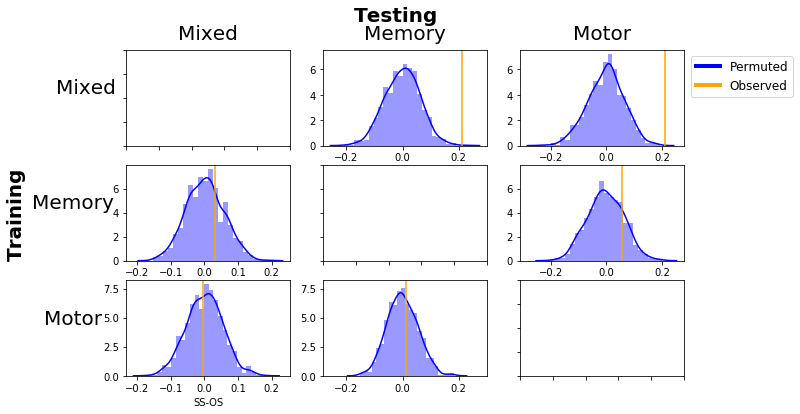

In [7]:
#DT permutation across task 

#Diff task 
fig=plt.figure(figsize=(10,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=3, ncols=3)
fig.suptitle('Testing', fontsize=20, fontweight='bold')
fig.text(-0.04, 0.5, 'Training', va='center', fontweight='bold',fontsize=20,rotation='vertical')
#Test Mixed blank

ax0=fig.add_subplot(gs[0,0])
plt.setp(ax0.get_yticklabels(), visible=False)
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.set_title('Mixed', fontsize=20, pad=10)
ax0.set_ylabel('Mixed', rotation=0, fontsize=20, labelpad=40)

#Mixed test memory
ax1=fig.add_subplot(gs[0,1])
ax=sns.distplot(mixTmem['diff'],color='blue', ax=ax1)
ax.axvline(x = diffDT.iloc[2,2],color='orange')
ax.set_title('Memory',fontsize=20, pad=10)

#Mixed test Motor
ax2=fig.add_subplot(gs[0,2],sharey=ax1)
ax=sns.distplot(mixTmot['diff'],color='blue', ax=ax2)
ax.axvline(x = diffDT.iloc[3,2],color='orange')
ax.set_title('Motor', fontsize=20, pad=10)
ax.set(ylabel=' ')
ax.legend(custom_lines, ['Permuted','Observed'],loc='upper right',fontsize='large',bbox_to_anchor=(1.7, 1.0))

#Memory test mixed
ax3=fig.add_subplot(gs[1,0])
ax=sns.distplot(memTmix['diff'],color='blue', ax=ax3)
ax.axvline(x = diffDT.iloc[0,2],color='orange')
ax.set_ylabel('Memory', rotation=0, fontsize=20, labelpad=40)

#Memory test memory
ax4=fig.add_subplot(gs[1,1])
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax4.get_xticklabels(), visible=False)

#Memory test motor
ax5=fig.add_subplot(gs[1,2],sharex=ax2, sharey=ax3)
ax=sns.distplot(memTmot['diff'],color='blue', ax=ax5)
ax.axvline(x = diffDT.iloc[1,2],color='orange')

#Motor test mixed
ax6=fig.add_subplot(gs[2,0],sharex=ax3)
ax=sns.distplot(motTmix['diff'],color='blue', ax=ax6)
ax.axvline(x = diffDT.iloc[5,2],color='orange')
ax.set_ylabel('Motor', rotation=0, fontsize=20, labelpad=30)
ax.set(xlabel='SS-OS')

#motor test mem
ax7=fig.add_subplot(gs[2,1],sharey=ax6, sharex=ax1)
ax=sns.distplot(motTmem['diff'],color='blue', ax=ax7)
ax.axvline(x = diffDT.iloc[4,2],color='orange')
ax.set(xlabel='')

#Motor test motor
ax8=fig.add_subplot(gs[2,2])
plt.setp(ax8.get_yticklabels(), visible=False)
plt.setp(ax8.get_xticklabels(), visible=False)



plt.savefig(thisDir+'output/mL/images/ridge/figs/DT_SSmOS_plots.png', bbox_inches='tight')

In [68]:
mu=DT.loc[train_task+'_'+test_task].values

In [71]:
mu[0]

0.03196428571428571

In [82]:
#dataframe to hold p values for each task by task
training=[]
testing=[]
p_values=[]
for train_task in taskList:
    for test_task in taskList:
        if train_task==test_task:
            continue
        else:
            DTmu=DT.loc[train_task+'_'+test_task].values
            DT_perm=pDT.loc[(pDT['train_task']==train_task) & (pDT['test_task']==test_task)]
            DT_perm_kept=DT_perm[DT_perm['diff']>DTmu[0]]
            count=DT_perm_kept['diff'].count()
            pval=(count+1)/(1001)
            training.append(train_task)
            testing.append(test_task)
            p_values.append(pval)
DT_all=pd.DataFrame({'train_task':training,'test_task':testing,'pval':p_values})

#DT_all=DT_all.pivot('train_task','test_task','pval')




In [83]:
DT_all

,train_task,test_task,pval
0,motor,mem,0.400599
1,motor,mixed,0.547453
2,mem,motor,0.189810
3,mem,mixed,0.281718
4,mixed,motor,0.000999
5,mixed,mem,0.001998


In [ ]:
#General results
fig=plt.figure(figsize=(10,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=1, ncols=2)
#Different Tasks
ax1=fig.add_subplot(gs[0,0])
ax=sns.distplot(perm_diff_task['acc_diff'],color='blue', ax=ax1)
g=sns.distplot(diff_task['acc_diff'], color='orange',ax=ax1)
ax.set(xlabel='Within-Between')
ax.set_title('Different Task')
ax.set(ylabel='Frequency')
ax.legend(custom_lines, ['Null','Real'],loc='upper right',fontsize='medium',bbox_to_anchor=(.97, .9))


ax2=fig.add_subplot(gs[0,1],sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.distplot(perm_same_task['acc_diff'],color='blue', ax=ax2)
g=sns.distplot(same_task['acc_diff'], color='orange',ax=ax2)
ax.set(xlabel='Within-Between')
ax.set_title('Same Task')
ax.set(ylabel=' ')
ax.legend(custom_lines, ['Permuted','Observed'],loc='upper right',fontsize='medium',bbox_to_anchor=(.97, .9))


In [ ]:
#same task 
fig=plt.figure(figsize=(10,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=1, ncols=3)
#Mixed
ax1=fig.add_subplot(gs[0,0])
ax=sns.distplot(perm_same_task[(perm_same_task['task']=='mixed')].acc_diff.values,color='blue', ax=ax1)
g=sns.distplot(same_task[(same_task['task']=='mixed')].acc_diff.values, color='orange',ax=ax1)
ax.set(xlabel='Within-Between')
ax.set_title('Mixed',fontsize=20, pad=10)
ax.set(ylabel='Frequency')


#Memory
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.distplot(perm_same_task[(perm_same_task['task']=='mem')].acc_diff.values,color='blue', ax=ax2)
g=sns.distplot(same_task[(same_task['task']=='mem')].acc_diff.values, color='orange',ax=ax2)
ax.set(xlabel='Within-Between')
ax.set_title('Memory',fontsize=20, pad=10)
ax.set(ylabel=' ')


ax3=fig.add_subplot(gs[0,2],sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False)
ax=sns.distplot(perm_same_task[(perm_same_task['task']=='motor')].acc_diff.values,color='blue', ax=ax3)
g=sns.distplot(same_task[(same_task['task']=='motor')].acc_diff.values, color='orange',ax=ax3)
ax.set(xlabel='Within-Between')
ax.set_title('Motor',fontsize=20, pad=10)
ax.set(ylabel=' ')
ax.legend(custom_lines, ['Permuted','Observed'],loc='upper right',fontsize='large',bbox_to_anchor=(1.7, 1.0))
#plt.savefig(thisDir+'output/mL/images/ridge/figs/sameTask_perm_plots.png', bbox_inches='tight')

In [ ]:
#Diff task 
fig=plt.figure(figsize=(10,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=3, ncols=3)
fig.suptitle('Testing', fontsize=20, fontweight='bold')
fig.text(-0.04, 0.5, 'Training', va='center', fontweight='bold',fontsize=20,rotation='vertical')
#Test Mixed blank

ax0=fig.add_subplot(gs[0,0])
plt.setp(ax0.get_yticklabels(), visible=False)
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.set_title('Mixed', fontsize=20, pad=10)
ax0.set_ylabel('Mixed', rotation=0, fontsize=20, labelpad=40)

#Mixed test memory
ax1=fig.add_subplot(gs[0,1])
ax=sns.distplot(perm_diff_task[(perm_diff_task.train_task=='mixed')&(perm_diff_task.test_task=='mem')].acc_diff.values,color='blue', ax=ax1)
g=sns.distplot(diff_task[(diff_task.train_task=='mixed')&(diff_task.test_task=='mem')].acc_diff.values, color='orange',ax=ax1)
ax.set_title('Memory',fontsize=20, pad=10)

#Mixed test Motor
ax2=fig.add_subplot(gs[0,2],sharey=ax1)
ax=sns.distplot(perm_diff_task[(perm_diff_task.train_task=='mixed')&(perm_diff_task.test_task=='motor')].acc_diff.values,color='blue', ax=ax2)
g=sns.distplot(diff_task[(diff_task.train_task=='mixed')&(diff_task.test_task=='motor')].acc_diff.values, color='orange',ax=ax2)
ax.set_title('Motor', fontsize=20, pad=10)
ax.set(ylabel=' ')
ax.legend(custom_lines, ['Permuted','Observed'],loc='upper right',fontsize='large',bbox_to_anchor=(1.7, 1.0))

#Memory test mixed
ax3=fig.add_subplot(gs[1,0])
ax=sns.distplot(perm_diff_task[(perm_diff_task.train_task=='mem')&(perm_diff_task.test_task=='mixed')].acc_diff.values,color='blue', ax=ax3)
g=sns.distplot(diff_task[(diff_task.train_task=='mem')&(diff_task.test_task=='mixed')].acc_diff.values, color='orange',ax=ax3)
ax.set_ylabel('Memory', rotation=0, fontsize=20, labelpad=40)

#Memory test memory
ax4=fig.add_subplot(gs[1,1])
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax4.get_xticklabels(), visible=False)

#Memory test motor
ax5=fig.add_subplot(gs[1,2],sharex=ax2, sharey=ax3)
ax=sns.distplot(perm_diff_task[(perm_diff_task.train_task=='mem')&(perm_diff_task.test_task=='motor')].acc_diff.values,color='blue', ax=ax5)
g=sns.distplot(diff_task[(diff_task.train_task=='mem')&(diff_task.test_task=='motor')].acc_diff.values, color='orange',ax=ax5)


#Motor test mixed
ax6=fig.add_subplot(gs[2,0],sharex=ax3)
ax=sns.distplot(perm_diff_task[(perm_diff_task.train_task=='motor')&(perm_diff_task.test_task=='mixed')].acc_diff.values,color='blue', ax=ax6)
g=sns.distplot(diff_task[(diff_task.train_task=='motor')&(diff_task.test_task=='mixed')].acc_diff.values, color='orange',ax=ax6)
ax.set_ylabel('Motor', rotation=0, fontsize=20, labelpad=30)

#motor test mem
ax7=fig.add_subplot(gs[2,1],sharey=ax6, sharex=ax1)
ax=sns.distplot(perm_diff_task[(perm_diff_task.train_task=='motor')&(perm_diff_task.test_task=='mem')].acc_diff.values,color='blue', ax=ax7)
g=sns.distplot(diff_task[(diff_task.train_task=='motor')&(diff_task.test_task=='mem')].acc_diff.values, color='orange',ax=ax7)


#Motor test motor
ax8=fig.add_subplot(gs[2,2])
plt.setp(ax8.get_yticklabels(), visible=False)
plt.setp(ax8.get_xticklabels(), visible=False)



plt.savefig(thisDir+'output/mL/images/ridge/figs/diffTask_perm_plots.png', bbox_inches='tight')



In [ ]:
#dataframe of pvals for each task in same task 
tasks=[]
p_val=[]
for task in taskList:
    tmpST=same_task.loc[same_task['task']==task]
    muST=tmpST.acc_diff.mean()
    ST_perm=perm_same_task.loc[perm_same_task['task']==task]
    ST_perm_keep=ST_perm[ST_perm['acc_diff']>muST]
    count=ST_perm_keep.count()
    p=(count.acc_diff+1)/8001
    tasks.append(task)
    p_val.append(p)
ST_all=pd.DataFrame({'task':tasks, 'pval':p_val})
    

ST_all.set_index('task',inplace=True)

In [ ]:
ax=sns.heatmap(ST_all, annot=True, vmin=0, vmax=.05, cmap="coolwarm")
ax.set_title('Same Task (W-B)', fontsize=20, pad=10)
ax.tick_params(labelsize=10)
plt.ylabel('Task',fontsize=20)
plt.savefig(thisDir+'output/mL/images/ridge/figs/ST_pvals_plots_all.png', bbox_inches='tight')

In [ ]:
#dataframe to hold p values for each task by task
training=[]
testing=[]
p_values=[]
for train_task in taskList:
    for test_task in taskList:
        if train_task==test_task:
            continue
        else:
            DT=diff_task.loc[(diff_task['train_task']==train_task) & (diff_task['test_task']==test_task)]
            DTmu=DT.acc_diff.mean()
            DT_perm=perm_diff_task.loc[(perm_diff_task['train_task']==train_task) & (perm_diff_task['test_task']==test_task)]

            DT_perm_kept=DT_perm[DT_perm['acc_diff']>DTmu]
            count=DT_perm_kept.count()
            pval=(count.acc_diff+1)/(8001)
            training.append(train_task)
            testing.append(test_task)
            p_values.append(pval)
DT_all=pd.DataFrame({'train_task':training,'test_task':testing,'pval':p_values})

DT_all=DT_all.pivot('train_task','test_task','pval')

In [ ]:
ax=sns.heatmap(DT_all, annot=True, vmin=0, vmax=.05, cmap="coolwarm")
ax.set_title('Diff Task (W-B)', fontsize=20, pad=10)
ax.tick_params(labelsize=10)
plt.ylabel('Train Task',fontsize=20)
plt.xlabel('Test Task',fontsize=20)
plt.savefig(thisDir+'output/mL/images/ridge/figs/DT_pvals_plots_all.png', bbox_inches='tight')

In [ ]:
#dataframe to hold p values for each iteration of analysis 
subs=[]
tasks=[]
p_values=[]
for task in taskList:
    ST=same_task.loc[same_task['task']==task]
    ST.set_index('sub',inplace=True)
    ST_perm=perm_same_task.loc[perm_same_task['task']==task]
    for sub in subList:
        ST_perm_sub=ST_perm.loc[ST_perm['sub']==sub]
        sub_acc=ST.get_value(sub,'acc_diff')
        ST_perm_kept=ST_perm_sub[ST_perm_sub['acc_diff']>sub_acc]
        count=ST_perm_kept.count()
        pval=(count.acc_diff+1)/(1001)
        subs.append(sub)
        tasks.append(task)
        p_values.append(pval)
ST_total=pd.DataFrame({'sub':subs,'task':tasks,'pval':p_values})


ST_total.to_csv(thisDir+'output/mL/results/ridge/permutation/ST_pvals.csv',index=False)

In [ ]:
#dataframe to hold p values for each iteration of analysis 
subs=[]
training=[]
testing=[]
p_values=[]
for train_task in taskList:
    for test_task in taskList:
        if train_task==test_task:
            continue
        else:
            DT=diff_task.loc[(diff_task['train_task']==train_task) & (diff_task['test_task']==test_task)]
            DT.set_index('sub',inplace=True)
            DT_perm=perm_diff_task.loc[(perm_diff_task['train_task']==train_task) & (perm_diff_task['test_task']==test_task)]
            for sub in subList:
                DT_perm_sub=DT_perm.loc[DT_perm['sub']==sub]
                sub_acc=DT.get_value(sub,'acc_diff')
                DT_perm_kept=DT_perm_sub[DT_perm_sub['acc_diff']>sub_acc]
                count=DT_perm_kept.count()
                pval=(count.acc_diff+1)/(1001)
                subs.append(sub)
                training.append(train_task)
                testing.append(test_task)
                p_values.append(pval)
DT_total=pd.DataFrame({'sub':subs,'train_task':training,'test_task':testing,'pval':p_values})


DT_total.to_csv(thisDir+'output/mL/results/ridge/permutation/DT_pvals.csv',index=False)


In [ ]:
import seaborn as sns

ST_total=ST_total.pivot('sub','task','pval')

In [ ]:
ax=sns.heatmap(ST_total, annot=True, vmin=0, vmax=.05, cmap="coolwarm")
ax.set_title('Same Task Permutation Test', fontsize=20, pad=10)
plt.ylabel('')
plt.xlabel('')
ax.tick_params(labelsize=20)
plt.savefig(thisDir+'output/mL/images/ridge/figs/ST_pvals_plots.png', bbox_inches='tight')

In [ ]:
motor=DT_total.loc[(DT_total['train_task']=='motor')]
motor.drop(columns=['train_task'],inplace=True)

motor=motor.pivot('sub','test_task','pval')

ax=sns.heatmap(motor, annot=True, vmin=0, vmax=.05, cmap="coolwarm")
ax.set_title('Training Motor', fontsize=20, pad=10)
plt.ylabel('')
plt.xlabel('')
ax.tick_params(labelsize=20)
plt.savefig(thisDir+'output/mL/images/ridge/figs/DT_pvals_motor_plots.png', bbox_inches='tight')

In [ ]:
mixed=DT_total.loc[(DT_total['train_task']=='mixed')]
mixed.drop(columns=['train_task'],inplace=True)

mixed=mixed.pivot('sub','test_task','pval')

ax=sns.heatmap(mixed, annot=True, vmin=0, vmax=.05, cmap="coolwarm")
ax.set_title('Training Mixed', fontsize=20, pad=10)
plt.ylabel('')
plt.xlabel('')
ax.tick_params(labelsize=20)
plt.savefig(thisDir+'output/mL/images/ridge/figs/DT_pvals_mixed_plots.png', bbox_inches='tight')

In [ ]:
mem=DT_total.loc[(DT_total['train_task']=='mem')]
mem.drop(columns=['train_task'],inplace=True)

mem=mem.pivot('sub','test_task','pval')

ax=sns.heatmap(mem, annot=True, vmin=0, vmax=.05, cmap="coolwarm")
ax.set_title('Training Memory', fontsize=20, pad=10)
plt.ylabel('')
plt.xlabel('')
ax.tick_params(labelsize=20)
plt.savefig(thisDir+'output/mL/images/ridge/figs/DT_pvals_mem_plots.png', bbox_inches='tight')

In [ ]:
#observed compared to permuted 
#CV 
fig=plt.figure(figsize=(10,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=2, ncols=3)
#Mixed
ax1=fig.add_subplot(gs[0,0])
plt.setp(ax1.get_xticklabels(), visible=False)
ax=sns.distplot(permCV[(permCV['task']=='mixed')].acc.values,color='blue', ax=ax1)
fig.suptitle('Same Task', fontsize=20, fontweight='bold')
fig.text(.01, 0.7, 'Same Sub', va='center', fontweight='bold',fontsize=20,rotation='vertical')
g=sns.distplot(CV[(CV['task']=='mixed')].acc.values, color='orange',ax=ax1)
ax.set(xlabel='')
ax.set_title('Mixed',fontsize=20, pad=10)
ax.set(ylabel='Frequency')


#Memory
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
ax=sns.distplot(permCV[(permCV['task']=='mem')].acc.values,color='blue', ax=ax2)
g=sns.distplot(CV[(CV['task']=='mem')].acc.values, color='orange',ax=ax2, kde_kws={'bw':0.1})
ax.set(xlabel='')
ax.set_title('Memory',fontsize=20, pad=10)
ax.set(ylabel=' ')

#Motor
ax3=fig.add_subplot(gs[0,2],sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
ax=sns.distplot(permCV[(permCV['task']=='motor')].acc.values,color='blue', ax=ax3)
g=sns.distplot(CV[(CV['task']=='motor')].acc.values, color='orange',ax=ax3)
ax.set(xlabel='')
ax.set_title('Motor',fontsize=20, pad=10)
ax.set(ylabel=' ')
ax.legend(custom_lines, ['Permuted','Observed'],loc='upper right',fontsize='large',bbox_to_anchor=(1.7, 1.0))


#Mixed
ax4=fig.add_subplot(gs[1,0], sharex=ax1,sharey=ax1)
ax=sns.distplot(permDS[(permDS['task']=='mixed')].acc.values,color='blue', ax=ax4)
fig.text(.01, 0.3, 'Diff Sub', va='center', fontweight='bold',fontsize=20,rotation='vertical')
g=sns.distplot(DS[(DS['task']=='mixed')].acc.values, color='orange',ax=ax4)
ax.set(xlabel='ACC')
ax.set(ylabel='Frequency')


#Memory
ax5=fig.add_subplot(gs[1,1],sharex=ax2,sharey=ax4)
plt.setp(ax5.get_yticklabels(), visible=False)
ax=sns.distplot(permDS[(permDS['task']=='mem')].acc.values,color='blue', ax=ax5)
g=sns.distplot(DS[(DS['task']=='mem')].acc.values, color='orange',ax=ax5)
ax.set(xlabel='ACC')
ax.set(ylabel=' ')

#Motor
ax6=fig.add_subplot(gs[1,2],sharey=ax4, sharex=ax3)
plt.setp(ax6.get_yticklabels(), visible=False)
ax=sns.distplot(permDS[(permDS['task']=='motor')].acc.values,color='blue', ax=ax6)
g=sns.distplot(DS[(DS['task']=='motor')].acc.values, color='orange',ax=ax6)
ax.set(xlabel='ACC')
ax.set(ylabel=' ')

plt.savefig(thisDir+'output/mL/images/ridge/figs/obs_perm_plots.png', bbox_inches='tight')

In [ ]:
#Diff task same sub obs comp to permuted
fig=plt.figure(figsize=(10,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=3, ncols=3)
fig.suptitle('Testing', fontsize=20, fontweight='bold')
fig.text(-0.04, 0.5, 'Training', va='center', fontweight='bold',fontsize=20,rotation='vertical')
#Test Mixed font
ax0=fig.add_subplot(gs[0,0])
plt.setp(ax0.get_yticklabels(), visible=False)
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.set_title('Mixed', fontsize=20, pad=10)
ax0.set_ylabel('Mixed', rotation=0, fontsize=20, labelpad=40)


#Mixed test memory
ax1=fig.add_subplot(gs[0,1])
ax=sns.distplot(permSS[(permSS.train_task=='mixed')&(permSS.test_task=='mem')].acc.values,color='blue', ax=ax1)
g=sns.distplot(SS[(SS.train_task=='mixed')&(SS.test_task=='mem')].acc.values, color='orange',ax=ax1)
ax.set_title('Memory',fontsize=20, pad=10)

#Mixed test Motor
ax2=fig.add_subplot(gs[0,2],sharey=ax1)
ax=sns.distplot(permSS[(permSS.train_task=='mixed')&(permSS.test_task=='motor')].acc.values,color='blue', ax=ax2)
g=sns.distplot(SS[(SS.train_task=='mixed')&(SS.test_task=='motor')].acc.values, color='orange',ax=ax2)
ax.set_title('Motor', fontsize=20, pad=10)
ax.set(ylabel=' ')
ax.legend(custom_lines, ['Permuted','Observed'],loc='upper right',fontsize='large',bbox_to_anchor=(1.7, 1.0))

#Memory test mixed
ax3=fig.add_subplot(gs[1,0])
ax=sns.distplot(permSS[(permSS.train_task=='mem')&(permSS.test_task=='mixed')].acc.values,color='blue', ax=ax3)
g=sns.distplot(SS[(SS.train_task=='mem')&(SS.test_task=='mixed')].acc.values, color='orange',ax=ax3)
ax.set_ylabel('Memory', rotation=0, fontsize=20, labelpad=40)

#Memory test memory
ax4=fig.add_subplot(gs[1,1])
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax4.get_xticklabels(), visible=False)

#Memory test motor
ax5=fig.add_subplot(gs[1,2],sharex=ax2, sharey=ax3)
ax=sns.distplot(permSS[(permSS.train_task=='mem')&(permSS.test_task=='motor')].acc.values,color='blue', ax=ax5)
g=sns.distplot(SS[(SS.train_task=='mem')&(SS.test_task=='motor')].acc.values, color='orange',ax=ax5)


#Motor test mixed
ax6=fig.add_subplot(gs[2,0],sharex=ax3)
ax=sns.distplot(permSS[(permSS.train_task=='motor')&(permSS.test_task=='mixed')].acc.values,color='blue', ax=ax6)
g=sns.distplot(SS[(SS.train_task=='motor')&(SS.test_task=='mixed')].acc.values, color='orange',ax=ax6)
ax.set_ylabel('Motor', rotation=0, fontsize=20, labelpad=30)

#motor test mem
ax7=fig.add_subplot(gs[2,1],sharey=ax6, sharex=ax1)
ax=sns.distplot(permSS[(permSS.train_task=='motor')&(permSS.test_task=='mem')].acc.values,color='blue', ax=ax7)
g=sns.distplot(SS[(SS.train_task=='motor')&(SS.test_task=='mem')].acc.values, color='orange',ax=ax7)


#Motor test motor
ax8=fig.add_subplot(gs[2,2])
plt.setp(ax8.get_yticklabels(), visible=False)
plt.setp(ax8.get_xticklabels(), visible=False)



plt.savefig(thisDir+'output/mL/images/ridge/figs/obsSS_perm_plots.png', bbox_inches='tight')









In [ ]:
#Diff task diff sub obs comp permuted
fig=plt.figure(figsize=(10,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=3, ncols=3)
fig.suptitle('Testing', fontsize=20, fontweight='bold')
fig.text(-0.04, 0.5, 'Training', va='center', fontweight='bold',fontsize=20,rotation='vertical')
#Test Mixed font
ax0=fig.add_subplot(gs[0,0])
plt.setp(ax0.get_yticklabels(), visible=False)
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.set_title('Mixed', fontsize=20, pad=10)
ax0.set_ylabel('Mixed', rotation=0, fontsize=20, labelpad=40)


#Mixed test memory
ax1=fig.add_subplot(gs[0,1])
ax=sns.distplot(permBS[(permBS.train_task=='mixed')&(permBS.test_task=='mem')].acc.values,color='blue', ax=ax1)
g=sns.distplot(BS[(BS.train_task=='mixed')&(BS.test_task=='mem')].acc.values, color='orange',ax=ax1)
ax.set_title('Memory',fontsize=20, pad=10)

#Mixed test Motor
ax2=fig.add_subplot(gs[0,2],sharey=ax1)
ax=sns.distplot(permBS[(permBS.train_task=='mixed')&(permBS.test_task=='motor')].acc.values,color='blue', ax=ax2)
g=sns.distplot(BS[(BS.train_task=='mixed')&(BS.test_task=='motor')].acc.values, color='orange',ax=ax2)
ax.set_title('Motor', fontsize=20, pad=10)
ax.set(ylabel=' ')
ax.legend(custom_lines, ['Permuted','Observed'],loc='upper right',fontsize='large',bbox_to_anchor=(1.7, 1.0))

#Memory test mixed
ax3=fig.add_subplot(gs[1,0])
ax=sns.distplot(permBS[(permBS.train_task=='mem')&(permBS.test_task=='mixed')].acc.values,color='blue', ax=ax3)
g=sns.distplot(BS[(BS.train_task=='mem')&(BS.test_task=='mixed')].acc.values, color='orange',ax=ax3)
ax.set_ylabel('Memory', rotation=0, fontsize=20, labelpad=40)

#Memory test memory
ax4=fig.add_subplot(gs[1,1])
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax4.get_xticklabels(), visible=False)

#Memory test motor
ax5=fig.add_subplot(gs[1,2],sharex=ax2, sharey=ax3)
ax=sns.distplot(permBS[(permBS.train_task=='mem')&(permBS.test_task=='motor')].acc.values,color='blue', ax=ax5)
g=sns.distplot(BS[(BS.train_task=='mem')&(BS.test_task=='motor')].acc.values, color='orange',ax=ax5)


#Motor test mixed
ax6=fig.add_subplot(gs[2,0],sharex=ax3)
ax=sns.distplot(permBS[(permBS.train_task=='motor')&(permBS.test_task=='mixed')].acc.values,color='blue', ax=ax6)
g=sns.distplot(BS[(BS.train_task=='motor')&(BS.test_task=='mixed')].acc.values, color='orange',ax=ax6)
ax.set_ylabel('Motor', rotation=0, fontsize=20, labelpad=30)

#motor test mem
ax7=fig.add_subplot(gs[2,1],sharey=ax6, sharex=ax1)
ax=sns.distplot(permBS[(permBS.train_task=='motor')&(permBS.test_task=='mem')].acc.values,color='blue', ax=ax7)
g=sns.distplot(BS[(BS.train_task=='motor')&(BS.test_task=='mem')].acc.values, color='orange',ax=ax7)


#Motor test motor
ax8=fig.add_subplot(gs[2,2])
plt.setp(ax8.get_yticklabels(), visible=False)
plt.setp(ax8.get_xticklabels(), visible=False)



plt.savefig(thisDir+'output/mL/images/ridge/figs/obsBS_perm_plots.png', bbox_inches='tight')









In [ ]:
#obs comp perm CV
#dataframe of pvals for each task in same task 
tasks=[]
p_val=[]
for task in taskList:
    tmpCV=CV.loc[CV['task']==task]
    muCV=tmpCV.acc.mean()
    CV_perm=permCV.loc[permCV['task']==task]
    CV_perm_keep=CV_perm[CV_perm['acc']>muCV]
    count=CV_perm_keep.count()
    p=(count.acc+1)/8001
    tasks.append(task)
    p_val.append(p)
CV_all=pd.DataFrame({'task':tasks, 'pval':p_val})
    

CV_all.set_index('task',inplace=True)


In [ ]:
#DS
tasks=[]
p_val=[]
for task in taskList:
    tmpDS=DS.loc[DS['task']==task]
    muDS=tmpDS.acc.mean()
    DS_perm=permDS.loc[permDS['task']==task]
    DS_perm_keep=DS_perm[DS_perm['acc']>muDS]
    count=DS_perm_keep.count()
    p=(count.acc+1)/8001
    tasks.append(task)
    p_val.append(p)
DS_all=pd.DataFrame({'task':tasks, 'pval':p_val})
    

DS_all.set_index('task',inplace=True)


In [ ]:
#SS
training=[]
testing=[]
p_values=[]
for train_task in taskList:
    for test_task in taskList:
        if train_task==test_task:
            continue
        else:
            SS=SS.loc[(SS['train_task']==train_task) & (SS['test_task']==test_task)]
            SSmu=SS.acc.mean()
            permSS=permSS.loc[(permSS['train_task']==train_task) & (permSS['test_task']==test_task)]

            permSS_kept=permSS[permSS['acc']>SSmu]
            count=permSS_kept.count()
            pval=(count.acc+1)/(8001)
            training.append(train_task)
            testing.append(test_task)
            p_values.append(pval)
SS_all=pd.DataFrame({'train_task':training,'test_task':testing,'pval':p_values})





In [ ]:
#BS
training=[]
testing=[]
p_values=[]
for train_task in taskList:
    for test_task in taskList:
        if train_task==test_task:
            continue
        else:
            BS=BS.loc[(BS['train_task']==train_task) & (BS['test_task']==test_task)]
            BSmu=BS.acc.mean()
            permBS=permBS.loc[(permBS['train_task']==train_task) & (permBS['test_task']==test_task)]

            permBS_kept=permBS[permBS['acc']>BSmu]
            count=permBS_kept.count()
            pval=(count.acc+1)/(8001)
            training.append(train_task)
            testing.append(test_task)
            p_values.append(pval)
BS_all=pd.DataFrame({'train_task':training,'test_task':testing,'pval':p_values})



In [ ]:
CV_all['Analysis']='SameSub'
DS_all['Analysis']='DiffSub'


ST=pd.concat([CV_all, DS_all])
ST.reset_index(inplace=True)
ST=ST.pivot('Analysis','task','pval')

In [ ]:
ax=sns.heatmap(ST, annot=True, vmin=0, vmax=.05, cmap="coolwarm")
ax.set_title('Same Task', fontsize=20, pad=10)
plt.ylabel('')
plt.xlabel('')
ax.tick_params(labelsize=15)
plt.savefig(thisDir+'output/mL/images/ridge/figs/general_ST_pvals_plots.png', bbox_inches='tight')

In [ ]:
SS_pivot=SS_all.pivot('train_task','test_task','pval')
BS_pivot=BS_all.pivot('train_task','test_task','pval')

In [ ]:
ax=sns.heatmap(SS_pivot, annot=True, vmin=0, vmax=.05, cmap="coolwarm")
ax.set_title('Same Sub', fontsize=20, pad=10)
plt.ylabel('Train',fontsize=15)
plt.xlabel('Test',fontsize=15)
ax.tick_params(labelsize=15)
plt.savefig(thisDir+'output/mL/images/ridge/figs/general_SS_pvals_plots.png', bbox_inches='tight')

In [ ]:
ax=sns.heatmap(BS_pivot, annot=True, vmin=0, vmax=.05, cmap="coolwarm")
ax.set_title('Diff Sub', fontsize=20, pad=10)
plt.ylabel('Train',fontsize=15)
plt.xlabel('Test',fontsize=15)
ax.tick_params(labelsize=15)
plt.savefig(thisDir+'output/mL/images/ridge/figs/general_BS_pvals_plots.png', bbox_inches='tight')

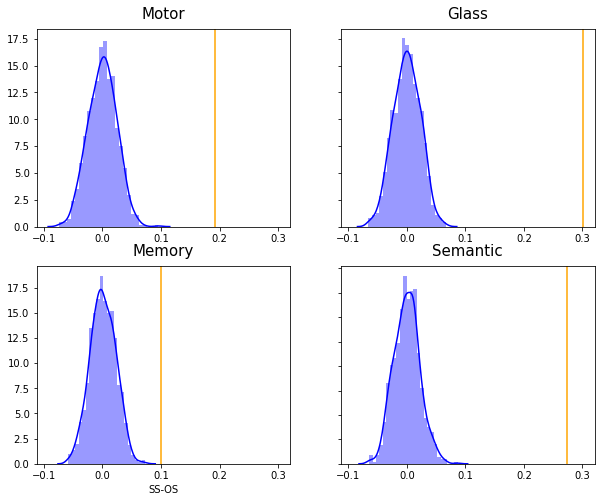

In [60]:
#General results
fig=plt.figure(figsize=(10,8), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=2, ncols=2)

#Different Tasks
ax1=fig.add_subplot(gs[0,0])
ax=sns.distplot(mot['diff'], ax=ax1,color='blue')
ax.axvline(x = diffST.iloc[2,1],color='orange')
ax.set_title('Motor', fontsize=15, pad=10)
ax.set(xlabel='')


ax2=fig.add_subplot(gs[0,1],sharey=ax1,sharex=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.distplot(gla['diff'], ax=ax2,color='blue')
ax.axvline(x = diffST.iloc[0,1], color='orange')
ax.set_title('Glass', fontsize=15, pad=10)
ax.set(xlabel='')

ax3=fig.add_subplot(gs[1,0],sharex=ax1)
ax=sns.distplot(mem['diff'], ax=ax3,color='blue')
ax.axvline(x = diffST.iloc[1,1],color='orange')
ax.set_title('Memory', fontsize=15, pad=10)
ax.set(xlabel='SS-OS')

ax4=fig.add_subplot(gs[1,1],sharex=ax1)
plt.setp(ax4.get_yticklabels(), visible=False)
ax=sns.distplot(sem['diff'], ax=ax4,color='blue')
ax.axvline(x = diffST.iloc[3,1],color='orange')
ax.set_title('Semantic', fontsize=15, pad=10)
ax.set(xlabel=' ')
plt.savefig(thisDir+'output/mL_allTask/images/ridge/figs/ST_SSmOS_plots.png', bbox_inches='tight')

In [67]:
#dataframe of pvals for each task in same task 
#diffST.set_index('task',inplace=True)
tasks=[]
p_val=[]
taskList=['mem','motor','semantic','glass']
for task in taskList:
    muST=diffST.loc[task].values
    ST_perm=pST.loc[pST['task']==task]
    ST_perm_keep=ST_perm[ST_perm['diff']>muST[0]]
    count=ST_perm_keep['diff'].count()
    p=(count+1)/1001
    tasks.append(task)
    p_val.append(p)
ST_all=pd.DataFrame({'task':tasks, 'pval':p_val})
    

ST_all.set_index('task',inplace=True)

In [68]:
ST_all

,pval
task,
mem,0.000999
motor,0.000999
semantic,0.000999
glass,0.000999


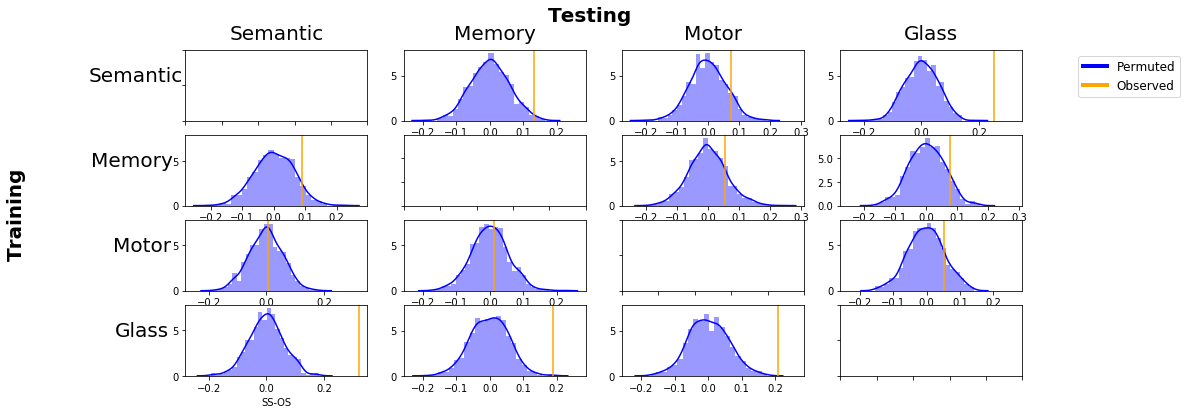

In [2]:
#DT permutation across task 

#Diff task 
fig=plt.figure(figsize=(15,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=4, ncols=4)
fig.suptitle('Testing', fontsize=20, fontweight='bold')
fig.text(-0.04, 0.5, 'Training', va='center', fontweight='bold',fontsize=20,rotation='vertical')

#Test Semantic blank
ax0=fig.add_subplot(gs[0,0])
plt.setp(ax0.get_yticklabels(), visible=False)
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.set_title('Semantic', fontsize=20, pad=10)
ax0.set_ylabel('Semantic', rotation=0, fontsize=20, labelpad=50)

#Semantic test memory
ax1=fig.add_subplot(gs[0,1])
ax=sns.distplot(semTmem['diff'],color='blue', ax=ax1)
ax.axvline(x = diffDT.iloc[10,2],color='orange')
ax.set_title('Memory',fontsize=20, pad=10)

#Semantic test Motor
ax2=fig.add_subplot(gs[0,2],sharey=ax1)
ax=sns.distplot(semTmot['diff'],color='blue', ax=ax2)
ax.axvline(x = diffDT.iloc[11,2],color='orange')
ax.set_title('Motor', fontsize=20, pad=10)
ax.set(ylabel=' ')

#Semantic test glass
ax3=fig.add_subplot(gs[0,3],sharey=ax1)
ax=sns.distplot(semTgla['diff'],color='blue', ax=ax3)
ax.axvline(x = diffDT.iloc[9,2],color='orange')
ax.set_title('Glass', fontsize=20, pad=10)
ax.set(ylabel=' ')
ax.legend(custom_lines, ['Permuted','Observed'],loc='upper right',fontsize='large',bbox_to_anchor=(1.9, 1.0))


#Memory test semantic
ax4=fig.add_subplot(gs[1,0])
ax=sns.distplot(memTsem['diff'],color='blue', ax=ax4)
ax.axvline(x = diffDT.iloc[5,2],color='orange')
ax.set_ylabel('Memory', rotation=0, fontsize=20, labelpad=40)

#Memory test memory
ax5=fig.add_subplot(gs[1,1])
plt.setp(ax5.get_yticklabels(), visible=False)
plt.setp(ax5.get_xticklabels(), visible=False)

#Memory test motor
ax6=fig.add_subplot(gs[1,2],sharex=ax2, sharey=ax4)
ax=sns.distplot(memTmot['diff'],color='blue', ax=ax6)
ax.axvline(x = diffDT.iloc[4,2],color='orange')

#Memory test glass
ax7=fig.add_subplot(gs[1,3],sharex=ax2, sharey=ax5)
ax=sns.distplot(memTgla['diff'],color='blue', ax=ax7)
ax.axvline(x = diffDT.iloc[3,2],color='orange')

#Motor test semantic
ax8=fig.add_subplot(gs[2,0],sharex=ax3)
ax=sns.distplot(motTsem['diff'],color='blue', ax=ax8)
ax.axvline(x = diffDT.iloc[8,2],color='orange')
ax.set_ylabel('Motor', rotation=0, fontsize=20, labelpad=30)
ax.set(xlabel='SS-OS')

#motor test mem
ax9=fig.add_subplot(gs[2,1],sharey=ax8, sharex=ax1)
ax=sns.distplot(motTmem['diff'],color='blue', ax=ax9)
ax.axvline(x = diffDT.iloc[7,2],color='orange')
ax.set(xlabel='')

#Motor test motor
ax10=fig.add_subplot(gs[2,2])
plt.setp(ax10.get_yticklabels(), visible=False)
plt.setp(ax10.get_xticklabels(), visible=False)

#motor test glass
ax11=fig.add_subplot(gs[2,3],sharey=ax8, sharex=ax1)
ax=sns.distplot(motTgla['diff'],color='blue', ax=ax11)
ax.axvline(x = diffDT.iloc[6,2],color='orange')
ax.set(xlabel='')





#Glass test semantic
ax12=fig.add_subplot(gs[3,0],sharex=ax3)
ax=sns.distplot(glaTsem['diff'],color='blue', ax=ax12)
ax.axvline(x = diffDT.iloc[2,2],color='orange')
ax.set_ylabel('Glass', rotation=0, fontsize=20, labelpad=30)
ax.set(xlabel='SS-OS')

#glass test mem
ax13=fig.add_subplot(gs[3,1],sharey=ax8, sharex=ax1)
ax=sns.distplot(glaTmem['diff'],color='blue', ax=ax13)
ax.axvline(x = diffDT.iloc[0,2],color='orange')
ax.set(xlabel='')



#glass test motor
ax14=fig.add_subplot(gs[3,2],sharey=ax8, sharex=ax1)
ax=sns.distplot(glaTmot['diff'],color='blue', ax=ax14)
ax.axvline(x = diffDT.iloc[1,2],color='orange')
ax.set(xlabel='')

#glass test glass
ax15=fig.add_subplot(gs[3,3])
plt.setp(ax15.get_yticklabels(), visible=False)
plt.setp(ax15.get_xticklabels(), visible=False)

plt.savefig(thisDir+'output/mL_allTask/images/ridge/figs/DT_SSmOS_plots.png', bbox_inches='tight')

In [104]:
#dataframe to hold p values for each task by task
training=[]
testing=[]
p_values=[]
for train_task in taskList:
    for test_task in taskList:
        if train_task==test_task:
            continue
        else:
            DTmu=DT.loc[train_task+'_'+test_task].values
            DT_perm=pDT.loc[(pDT['train_task']==train_task) & (pDT['test_task']==test_task)]
            DT_perm_kept=DT_perm[DT_perm['diff']>DTmu[0]]
            count=DT_perm_kept['diff'].count()
            pval=(count+1)/(1001)
            training.append(train_task)
            testing.append(test_task)
            p_values.append(pval)
DT_all=pd.DataFrame({'train_task':training,'test_task':testing,'pval':p_values})

In [105]:
DT_all

,train_task,test_task,pval
0,mem,motor,0.170829
1,mem,semantic,0.066933
2,mem,glass,0.094905
3,motor,mem,0.413586
4,motor,semantic,0.437562
5,motor,glass,0.151848
6,semantic,mem,0.011988
7,semantic,motor,0.099900
8,semantic,glass,0.000999
9,glass,mem,0.000999
